In [19]:
from model import Segmentator
from config import update_config
from config import CONF

import matplotlib.pyplot as plt
import torchvision.transforms.v2 as tfs_v2
from torchvision.tv_tensors import Image as TVImage, Mask as TVMask
from PIL import Image
import numpy as np


In [20]:
# path_to_model = './meta_data/models/best.pth'
# path_to_test = './data/val'

# update_config(CONF, "./config.yaml")

# model = Segmentator('cuda:3', CONF)

# model.load_model(path_to_model)
# hook = model.test(path_to_test, 1, save_dir="test_results")

In [ ]:
path_img = './data_tiff/train/10078690_15.tiff'
path_mask = './data_tiff/train_labels/10078690_15.tif'
mode = 'train'
size = 1024
crop_size = 400

In [22]:
resize_img = tfs_v2.Resize(
    (size, size), 
    interpolation=tfs_v2.InterpolationMode.LANCZOS
)
resize_mask = tfs_v2.Resize(
    (size, size), 
    interpolation=tfs_v2.InterpolationMode.NEAREST
)

if mode == 'train':
    joint_transforms = tfs_v2.Compose([
        tfs_v2.RandomHorizontalFlip(p=0.5),
        tfs_v2.RandomVerticalFlip(p=0.5),
        tfs_v2.RandomAffine(
            degrees=30,
            translate=(0.05, 0.05),
            scale=(0.9, 1.1),
            shear=10,
            fill=0
        ),
        tfs_v2.RandomCrop(
            size=(crop_size, crop_size),
            pad_if_needed=True
        )
    ])
    
    color_transforms = tfs_v2.ColorJitter(
        brightness=0.3,
        contrast=0.3,
        saturation=0.3,
        hue=0.1
    )


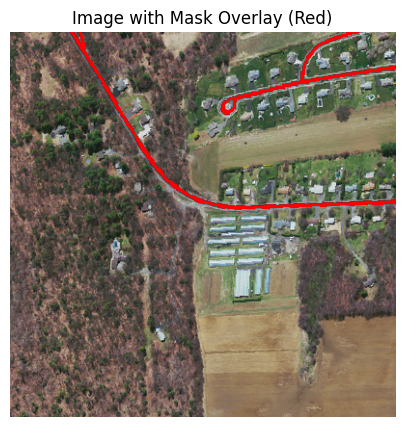

In [23]:
img = Image.open(path_img).convert('RGB')
mask = Image.open(path_mask).convert('L')

img = resize_img(img)
mask = resize_mask(mask)

img = TVImage(img)
mask = TVMask(mask)

img, mask = joint_transforms(img, mask)
img = color_transforms(img)

img_np = img.permute(1, 2, 0).cpu().numpy()  # [H, W, 3]
mask_np = mask.squeeze().cpu().numpy()       # [H, W]

plt.figure(figsize=(10, 5))
plt.imshow(img_np)

mask_overlay = np.zeros((*mask_np.shape, 4))
mask_overlay[mask_np > 0.5] = [1, 0, 0, 1]

plt.imshow(mask_overlay)

plt.title('Image with Mask Overlay (Red)')
plt.axis('off')
plt.show()
